# Prep MRI QC

**Author**: Haroon Popal

This notebook will create a list of participant and their run data for the social reward task that meets quality control thresholds.

In [4]:
import os
import pandas as pd

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/social_reward/'

os.chdir(proj_dir)

In [36]:
mriqc_raw = pd.read_csv(proj_dir+'misc/SCN fMRI Master Log - QC.csv', index_col=0)
mriqc_raw.head()

,Anatomical,192x512x512,Unnamed: 3,Unnamed: 4,Unnamed: 5,HBN movie - Run 1,Unnamed: 7,NS - Run 1,Unnamed: 9,NS - Run 2,...,Unnamed: 15,SR - Run 2,Unnamed: 17,SR - Run 3,Unnamed: 19,SR - Run 4,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
,,,,,,,,,,,,,,,,,,,,,
SID,T1w,Dimension #s,Norm1,Norm2,Norm3,Alignment,Time: # of Volumes,Alignment,Time: # of Volumes,Alignment,...,Time: # of Volumes,Alignment,Time: # of Volumes,Alignment,Time: # of Volumes,Alignment,Time: # of Volumes,Error Messages,Checked Reprocessed Data?,Overall Notes
SCN_101,good,192x512x512,good,good,good,good,170,good,518.75,good,...,300,good,300,good,300,good,300,Node Name: fmriprep_wf.single_subject_SCN101_w...,TRUE,"smudging in NS 2 and SR 2, general pixellation..."
SCN_102,good,192x512x512,good,good,good,good,170,good,518.75,good,...,300,good,300,good,300,good,300,No errors to report!,TRUE,pixellation in all moving runs
SCN_103,good,192x512x512,good,good,good,good,170,good,518.75,good,...,300,good,300,good,300,good,300,No errors to report!,TRUE,NaN
SCN_104,good,192x512x512,good,good,good,good,170,good,518.75,good,...,300,good,300,good,300,good,300,No errors to report!,TRUE,"most have some smudges, but small enough (NS 1..."


In [48]:
# Drop irrelevant rows
mriqc = mriqc_raw.drop([x for x in mriqc_raw.index if not str(x).startswith('SCN')])

# Remove irrelvant columns
irr_col_names = [x for x in mriqc.columns if not x.startswith('SR - ')]
mriqc = mriqc.drop(columns=irr_col_names)

# Add fmriprep sub- prefix
mriqc.index = 'sub-'+ mriqc.index

# Remove underscore for participant ID
mriqc.index = [sub.replace('_', '') for sub in mriqc.index]

# Name index column
mriqc.index.name = 'participant_id'

mriqc.head()

,SR - Run 1,SR - Run 2,SR - Run 3,SR - Run 4
participant_id,,,,
sub-SCN101,good,good,good,good
sub-SCN102,good,good,good,good
sub-SCN103,good,good,good,good
sub-SCN104,good,good,good,good
sub-SCN105,good,good,good,good


In [59]:
# Clean up extra spaces at the end of column values
for col in mriqc.columns:
    mriqc[col] = mriqc[col].str.strip()

In [69]:
mriqc_melt = pd.melt(mriqc.reset_index(), id_vars='participant_id', var_name='run')
mriqc_melt

,participant_id,run,value
0,sub-SCN101,SR - Run 1,good
1,sub-SCN102,SR - Run 1,good
2,sub-SCN103,SR - Run 1,good
3,sub-SCN104,SR - Run 1,good
4,sub-SCN105,SR - Run 1,good
...,...,...,...
371,sub-SCN231,SR - Run 4,NaN
372,sub-SCN234,SR - Run 4,Researcher check
373,sub-SCN238,SR - Run 4,NaN
374,sub-SCN239,SR - Run 4,NaN


<Axes: xlabel='run,value'>

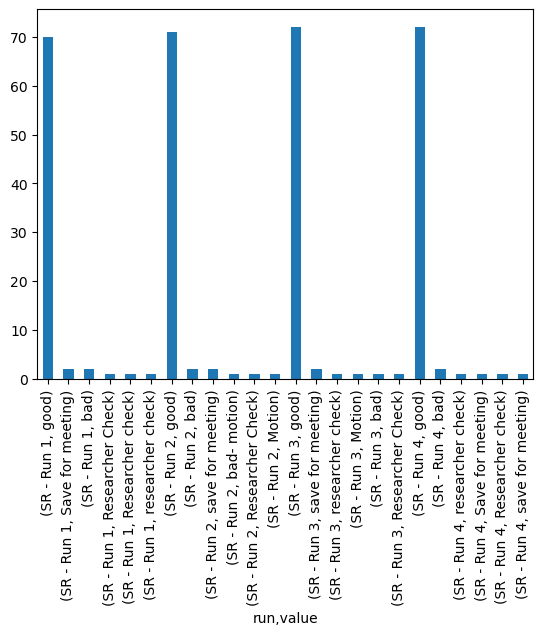

In [70]:
mriqc_melt.groupby('run')['value'].value_counts().plot.bar()

In [71]:
mriqc_melt_good = mriqc_melt[mriqc_melt['value'] == 'good']

mriqc_melt_good[['participant_id','run']].to_csv(proj_dir+'derivatives/participants_good.csv', index=False)